Imports

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(4272, 2848)


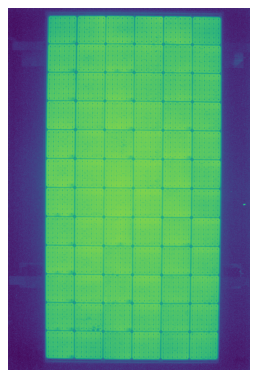

In [41]:
image = cv2.imread("C:/Users/chuck/OneDrive/Desktop/Honors/EL_images/Q72712M1801AJO0421_IMG_8916.JPG", 0)
# image = cv2.imread("C:/Users/chuck/OneDrive/Desktop/Honors/EL_images/Q72712M1802ARK1119_IMG_8918.JPG", 0)

# image = cv2.fastNlMeansDenoising(image,None,10,7,21)
image = cv2.GaussianBlur(image, (5,5), 0)

print(image.shape)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image)

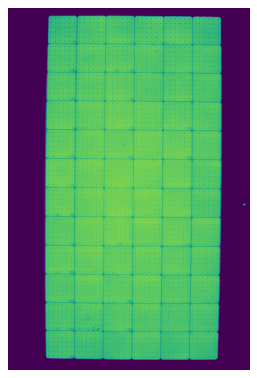

In [38]:
avg_intensity = int(cv2.mean(image)[0])
th = int(avg_intensity*0.8)
max_val = 255
ret, o4 = cv2.threshold(image, th, max_val, cv2.THRESH_TOZERO)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(o4)

In [ ]:
contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
image_cp = np.copy(image)
image_cp = cv2.drawContours(image_cp, contours, -1, (255,255,255), 10)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image_cp)

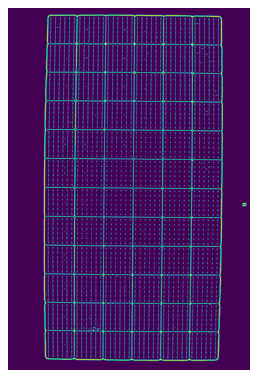

In [42]:
threshold2 = cv2.adaptiveThreshold(o4,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,11)
threshold2 = cv2.bitwise_not(threshold2)

plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(threshold2)

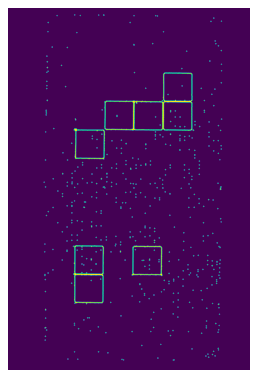

In [40]:
def find_similar_contours(example_shape, contours):
    similar_contours = []

    for contour in contours:
        # Approximate the contour with a polygon
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        if len(approx) == 4:
            similarity = cv2.matchShapes(approx, example_shape, cv2.CONTOURS_MATCH_I1, 0)
            if similarity < 0.01:
                similar_contours.append(contour)
    return similar_contours

# function that returns contours with similar means

contours, hierarchy = cv2.findContours(threshold2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
panel_shape = np.array([[0,0], [0,1], [1,1], [1,0]])
panel_contours = find_similar_contours(panel_shape, contours)
cropped_cp = np.copy(threshold2)*0
cropped = cv2.drawContours(cropped_cp, panel_contours, -1, (255,255,255), 10)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(cropped)